In [1]:
import numpy as np # for mathematical manupulation
import pandas as pd # for reading and writing data
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for advanced plotting
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score #Accuracy Measures
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.ensemble import IsolationForest # Model to detect isloated data using tree
from sklearn.neighbors import LocalOutlierFactor # Model to detect isloated data using neighbour
from sklearn.model_selection import train_test_split # split of records
import os # to walk over the files and folders
import pickle # so store the weights in the file

In [2]:
output = {1:'Yes',0:'No'} # assigning the meaning to 1 and 0 in target variable

In [3]:
data_path = os.chdir('..\dataset') # going to dataset folder

In [4]:
_data = pd.read_csv('Train.csv') # Reading Train Data

In [5]:
_data.shape # Checking shape

(23856, 18)

In [6]:
_data.dtypes # checking data types

INCIDENT_ID          object
DATE                 object
X_1                   int64
X_2                   int64
X_3                   int64
X_4                   int64
X_5                   int64
X_6                   int64
X_7                   int64
X_8                   int64
X_9                   int64
X_10                  int64
X_11                  int64
X_12                float64
X_13                  int64
X_14                  int64
X_15                  int64
MULTIPLE_OFFENSE      int64
dtype: object

In [7]:
_data.isnull().sum() # checking any null values

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

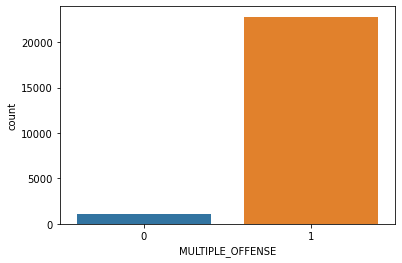

In [9]:
sns.countplot(_data['MULTIPLE_OFFENSE']) # getting overview of the target variable as we can see it is imbalanced data 

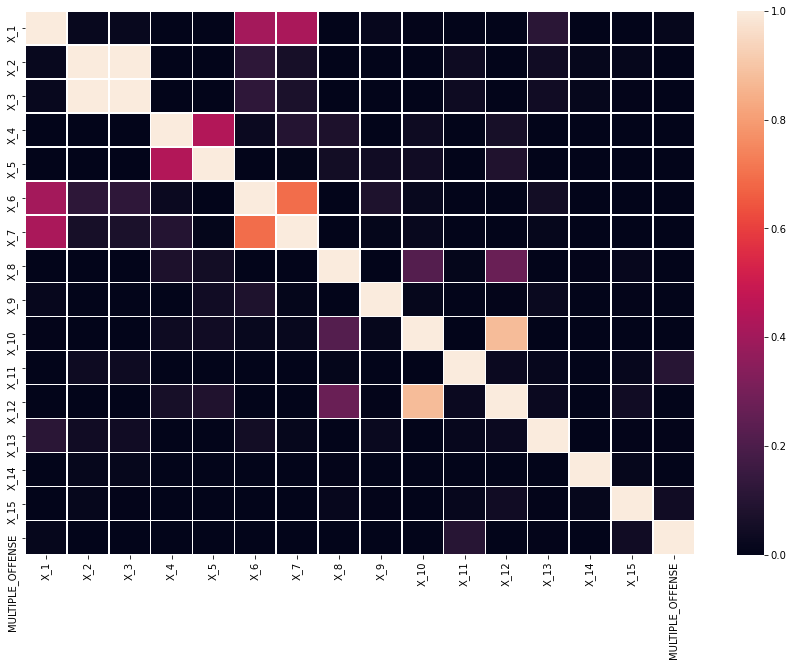

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(_data.corr(),vmin=0, vmax=1,linewidths=.5)

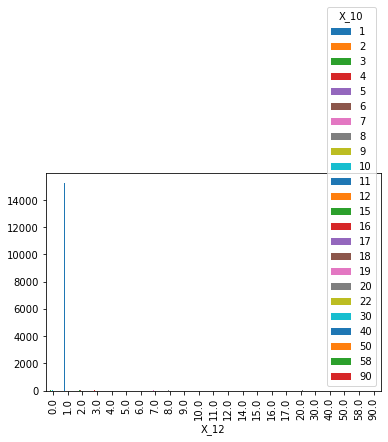

In [27]:
pd.crosstab(_data['X_12'],_data['X_10']).plot(kind='bar')
# as clearly seen when tha value of X_12 is 1 then the value of X_10 is also 1 

In [23]:
plt.figure(figsize=(15,10))
cor = _data.loc[_data['X_12'].isnull()==True,['X_10','X_12']]
cor

,X_10,X_12
167,1,NaN
236,1,NaN
274,1,NaN
315,1,NaN
430,1,NaN
...,...,...
23561,1,NaN
23680,1,NaN
23682,1,NaN
23714,1,NaN


<Figure size 1080x720 with 0 Axes>

In [28]:
# as seen from above figure the variable X_12 and X_10 have some relation
_data['X_12'].fillna(float(_data['X_12'].mode()),inplace=True) # Filing null values

In [30]:
_data['X_12']=_data['X_12'].astype('int64')

In [51]:
_data.head(10)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0,112,29,43,1
5,CR_96263,07-APR-03,0,45,45,10,3,1,0,1,6,1,303,1,72,62,34,1
6,CR_131400,22-JAN-08,0,30,35,7,3,7,1,0,5,1,174,0,112,29,43,1
7,CR_11981,14-MAY-93,0,8,7,7,3,9,8,0,5,1,316,1,72,62,34,1
8,CR_184134,21-AUG-16,0,49,49,6,5,8,3,1,1,1,316,1,103,14,34,1
9,CR_32634,25-AUG-96,1,4,4,6,5,15,10,0,5,2,145,1,103,29,34,0


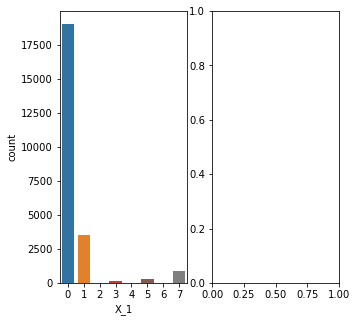

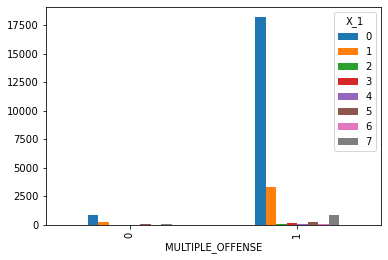

In [44]:
# Plotting every column with respect to the target
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.countplot(_data['X_1'])
plt.subplot(1,2,2)
pd.crosstab(_data['MULTIPLE_OFFENSE'],_data['X_1']).plot(kind='bar')

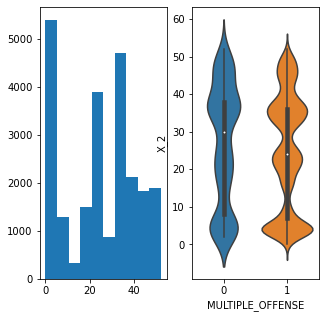

In [38]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.hist(_data['X_2'])
plt.subplot(1,2,2)
sns.violinplot(_data['MULTIPLE_OFFENSE'],_data['X_2'])

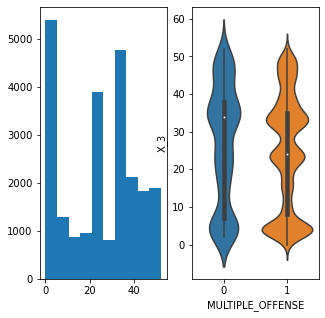

In [39]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.hist(_data['X_3'])
plt.subplot(1,2,2)
sns.violinplot(_data['MULTIPLE_OFFENSE'],_data['X_3'])

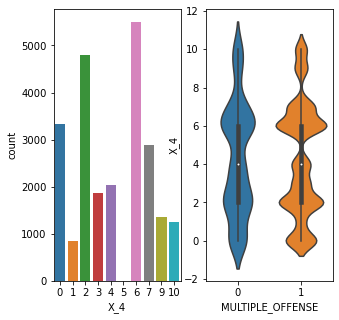

In [41]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.countplot(_data['X_4'])
plt.subplot(1,2,2)
sns.violinplot(_data['MULTIPLE_OFFENSE'],_data['X_4'])

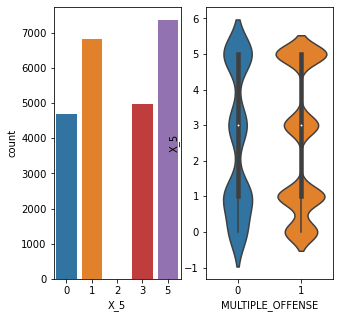

In [46]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.countplot(_data['X_5'])
plt.subplot(1,2,2)
sns.violinplot(_data['MULTIPLE_OFFENSE'],_data['X_5'])

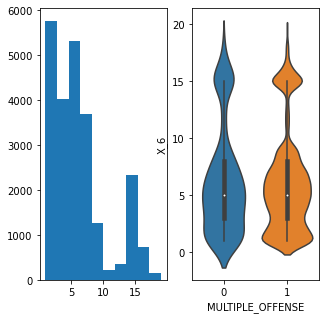

In [49]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.hist(_data['X_6'])
plt.subplot(1,2,2)
sns.violinplot(_data['MULTIPLE_OFFENSE'],_data['X_6'])

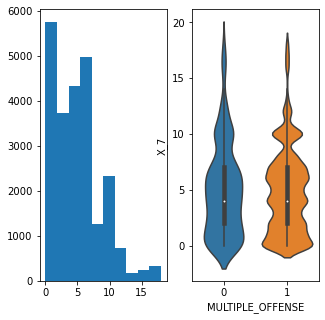

In [50]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.hist(_data['X_7'])
plt.subplot(1,2,2)
sns.violinplot(_data['MULTIPLE_OFFENSE'],_data['X_7'])

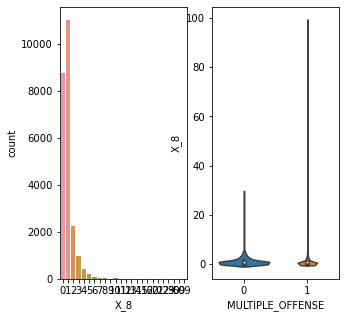

In [52]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.countplot(_data['X_8'])
plt.subplot(1,2,2)
sns.violinplot(_data['MULTIPLE_OFFENSE'],_data['X_8'])

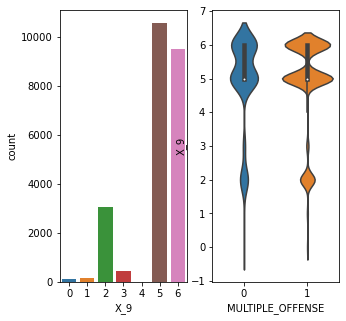

In [53]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.countplot(_data['X_9'])
plt.subplot(1,2,2)
sns.violinplot(_data['MULTIPLE_OFFENSE'],_data['X_9'])

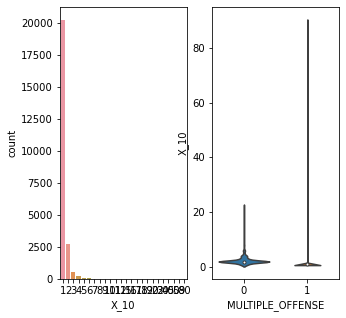

In [59]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.countplot(_data['X_10'])
plt.subplot(1,2,2)
sns.violinplot(_data['MULTIPLE_OFFENSE'],_data['X_10'])

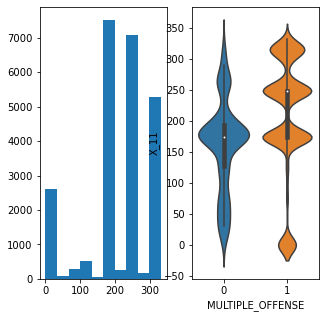

In [56]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.hist(_data['X_11'])
plt.subplot(1,2,2)
sns.violinplot(_data['MULTIPLE_OFFENSE'],_data['X_11'])

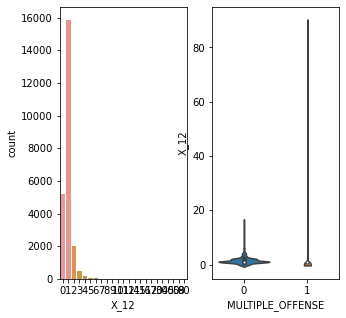

In [58]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.countplot(_data['X_12'])
plt.subplot(1,2,2)
sns.violinplot(_data['MULTIPLE_OFFENSE'],_data['X_12'])

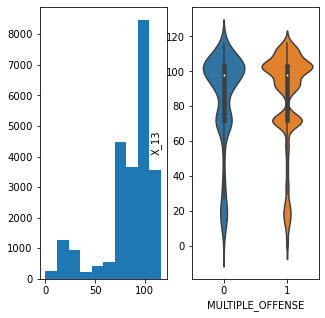

In [61]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.hist(_data['X_13'])
plt.subplot(1,2,2)
sns.violinplot(_data['MULTIPLE_OFFENSE'],_data['X_13'])

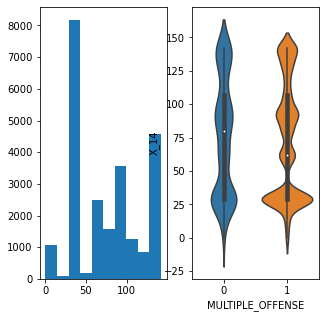

In [62]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.hist(_data['X_14'])
plt.subplot(1,2,2)
sns.violinplot(_data['MULTIPLE_OFFENSE'],_data['X_14'])

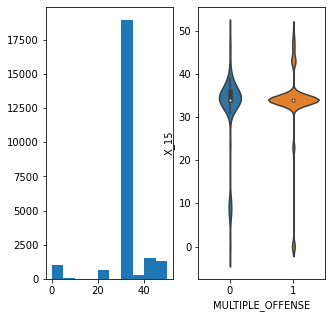

In [63]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.hist(_data['X_15'])
plt.subplot(1,2,2)
sns.violinplot(_data['MULTIPLE_OFFENSE'],_data['X_15'])

In [65]:
# Splitting the data into X and Y 
Y = _data['MULTIPLE_OFFENSE']
_data.drop(['MULTIPLE_OFFENSE','INCIDENT_ID','DATE'],axis=1, inplace=True)
X = _data

In [66]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [120]:
ran = RandomForestClassifier(n_estimators=120,max_depth=50) # Random Forest Algorithm, max_depth to avoid overfitting

In [121]:
ran.fit(x_train,y_train) # Fiting Data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
y_pred = ran.predict(x_test) # Predicting Values

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       327
           1       0.99      1.00      0.99      6830

    accuracy                           0.99      7157
   macro avg       0.97      0.91      0.94      7157
weighted avg       0.99      0.99      0.99      7157



In [124]:
print('Model used : {} with accuracy {} precision {} and recall {}'.format('Random Forest',accuracy_score(y_test,y_pred)*100,precision_score(y_test,y_pred)*100,recall_score(y_test,y_pred)*100))

Model used : Random Forest with accuracy 99.00796423082298 precision 99.14206776210557 and recall 99.82430453879941


In [125]:
pickle.dump(ran,open('Randome_Fore.pickle','wb'))

In [126]:
iso_1 = IsolationForest(n_estimators=150,max_samples=len(X),random_state=42,verbose=0)

In [128]:
lof = LocalOutlierFactor(n_neighbors=400, algorithm='kd_tree', leaf_size=300, metric='minkowski',p=2, metric_params=None)

In [129]:
y_pred_iso1 = iso_1.fit_predict(X)

In [130]:
y_pred_lof = lof.fit_predict(X)

In [131]:
y_pred_iso1 = pd.Series(y_pred_iso1).replace(-1,0)

In [132]:
y_pred_lof = pd.Series(y_pred_lof).replace(-1,0)

In [133]:
print('Model used : {} with accuracy {} precision {} and recall {}'.format('Isolation Forest',accuracy_score(Y,y_pred_iso1)*100,precision_score(Y,y_pred_iso1)*100,recall_score(Y,y_pred_iso1)*100))

Model used : Isolation Forest with accuracy 90.3588195841717 precision 96.19825020294039 and recall 93.60628400912762


In [134]:
print('Model used : {} with accuracy {} precision {} and recall {}'.format('LocalOutlierDetector',accuracy_score(Y,y_pred_lof)*100,precision_score(Y,y_pred_lof)*100,recall_score(Y,y_pred_lof)*100))

Model used : LocalOutlierDetector with accuracy 92.94097920858484 precision 96.02233077459874 and recall 96.61225206248903


In [135]:
test_copy = pd.read_csv('Test.csv')

In [137]:
test_copy.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [141]:
test_copy['X_12'].fillna(float(test_copy['X_12'].mode()), inplace=True)

In [143]:
test_copy.isnull().sum()

INCIDENT_ID    0
DATE           0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
dtype: int64

In [145]:
test_copy.dtypes

INCIDENT_ID     object
DATE            object
X_1              int64
X_2              int64
X_3              int64
X_4              int64
X_5              int64
X_6              int64
X_7              int64
X_8              int64
X_9              int64
X_10             int64
X_11             int64
X_12           float64
X_13             int64
X_14             int64
X_15             int64
dtype: object

In [146]:
test_copy['X_12'] = test_copy['X_12'].astype('int64')

In [148]:
incident_name = test_copy['INCIDENT_ID']

In [150]:
test_copy.drop(['INCIDENT_ID','DATE'], axis=1, inplace=True)

In [151]:
test_copy.columns

Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_13', 'X_14', 'X_15'],
      dtype='object')

In [152]:
Predicted_Y = ran.predict(test_copy)

In [154]:
sbmis_1 = pd.DataFrame(incident_name,columns=['INCIDENT_ID'])

In [155]:
sbmis_1['MULTIPLE_OFFENSE'] = Predicted_Y

In [156]:
sbmis_1

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1
...,...,...
15898,CR_44468,1
15899,CR_158460,1
15900,CR_115946,1
15901,CR_137663,1


In [157]:
sbmis_1.to_csv('final_submission_ran.csv')